## Null Hypotheses:

1) There is no significant difference inalcohol consumption between those who has heart disease and doesn't.

2) There is no significant difference in fruit consumption does between those who has heart disease and doesn't.

3) There is no significant difference in green vegetables consumption does between those who has heart disease and doesn't.

4) There is no significant difference in fried potato consumption does between those who has heart disease and doesn't.

5) There is no significant difference heart disease rate between smokers and non-smokers.

6) There is no significant difference heart disease rate between those who has other cancer and don't.

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
from pprint import pprint
from datetime import datetime
from pylab import *

from helpers import lin_reg
from helpers import box_plot


# File to Load (Remember to Change These)
csv_path = Path("datasets/CVD_cleaned.csv")

data_df = pd.read_csv(csv_path)


In [2]:
data_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Healthness_Score,Behaviour Score
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150,32.66,14.54,Yes,0,30,16,12,5,3
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165,77.11,28.29,No,0,30,0,4,4,3
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163,88.45,33.47,No,4,12,3,16,5,4
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180,93.44,28.73,No,0,30,30,8,4,5
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191,88.45,24.37,Yes,0,8,4,0,6,4


In [3]:
# Get the unique values for 'Heart_Disease' column.
heart_desease_values = list(data_df['Heart_Disease'].unique())
heart_desease_values

['No', 'Yes']

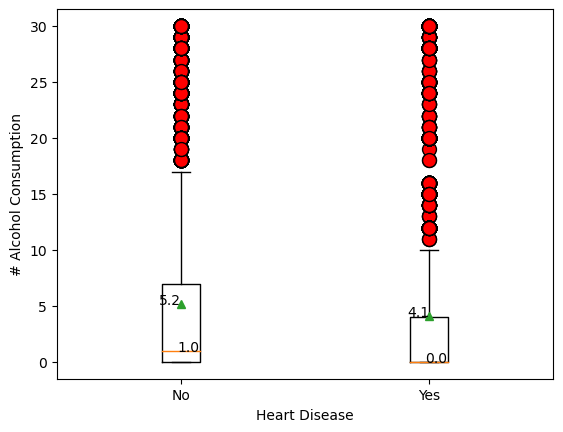

In [4]:
# Box plots for Alcohol_Consumption
ac_plot_dict = {}
for value in heart_desease_values:
    ac_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['Alcohol_Consumption'])
    
box_plot(plt, ac_plot_dict,"Heart Disease","# Alcohol Consumption")

In [81]:
#data_df.boxplot("Alcohol_Consumption", by="Heart_Disease", figsize=(20, 10))
no_group = ac_plot_dict['No']
yes_group = ac_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 2.5640209275570343e-92
Null hypothesis is rejected since our p-value '2.5640209275570343e-92' is lower than '0.1'.


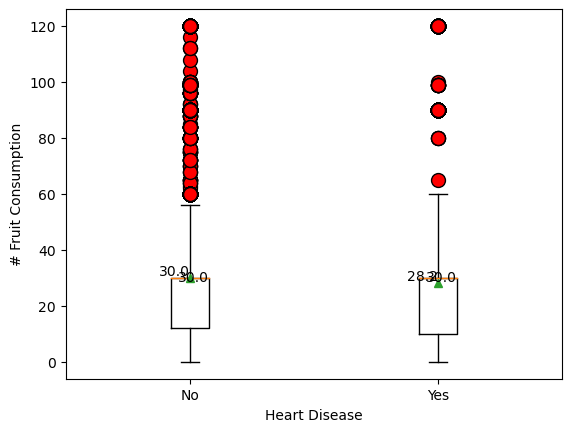

In [72]:
#Box plots for Fruit_Consumption

fc_plot_dict = {}
for value in heart_desease_values:
    fc_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['Fruit_Consumption'])
    
box_plot(plt, fc_plot_dict,"Heart Disease","# Fruit Consumption")

In [83]:
#data_df.boxplot("Fruit_Consumption", by="Heart_Disease", figsize=(20, 10))
no_group = fc_plot_dict['No']
yes_group = fc_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 1.1165920567363132e-29
Null hypothesis is rejected since our p-value '1.1165920567363132e-29' is lower than '0.1'.


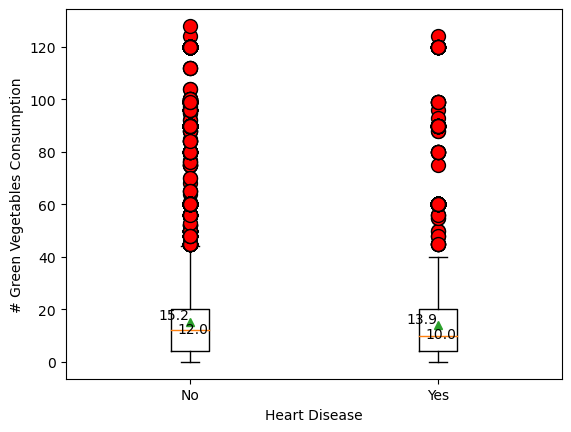

In [77]:
#Box plots for Green_Vegetables_Consumption

gvc_plot_dict = {}
for value in heart_desease_values:
    gvc_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['Green_Vegetables_Consumption'])
    
box_plot(plt, gvc_plot_dict,"Heart Disease","# Green Vegetables Consumption")

In [84]:
#data_df.boxplot("Green_Vegetables_Consumption", by="Heart_Disease", figsize=(20, 10))
no_group = gvc_plot_dict['No']
yes_group = gvc_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 1.3501822352236017e-45
Null hypothesis is rejected since our p-value '1.3501822352236017e-45' is lower than '0.1'.


Green_Vegetables_Consumption Analysis

No
283883
Yes
24971


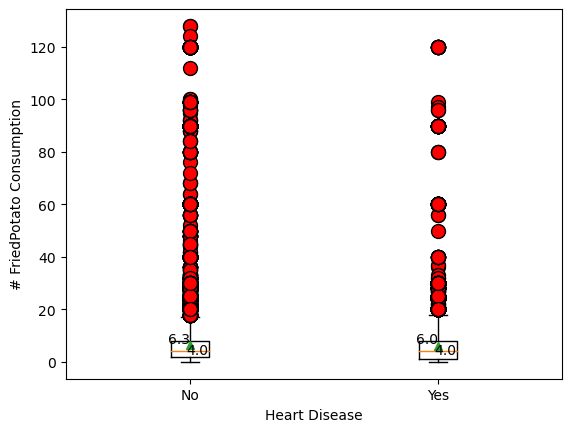

In [93]:
#Box plots for FriedPotato_Consumption

fpc_plot_dict = {}
for value in heart_desease_values:
    print(value)
    fpc_plot_dict[value] = list(data_df.loc[data_df['Heart_Disease'] == value, :]['FriedPotato_Consumption'])
    print(len(list(data_df.loc[data_df['Heart_Disease'] == value, :]['FriedPotato_Consumption'])))
    
box_plot(plt, fpc_plot_dict,"Heart Disease","# FriedPotato Consumption")

In [87]:
#data_df.boxplot("FriedPotato_Consumption", by="Heart_Disease", figsize=(20, 10))
no_group = fpc_plot_dict['No']
yes_group = fpc_plot_dict['Yes']
result = stats.ttest_ind(no_group, yes_group, equal_var=False)
critial_value = 0.1
rejected = result.pvalue < critial_value
print(f'p-value: {result.pvalue}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{result.pvalue}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{result.pvalue}' is higher than '{critial_value}'."))

p-value: 2.3605295647977296e-07
Null hypothesis is rejected since our p-value '2.3605295647977296e-07' is lower than '0.1'.


FriedPotato_Consumption ANalysis

In [97]:
#Pie charts for Smoking_History

smoker_df = data_df.loc[data_df['Smoking_History'] == "Yes", :]
non_smoker_df = data_df.loc[data_df['Smoking_History'] == "No", :]

smoker_with_hd_df = smoker_df.loc[smoker_df['Heart_Disease'] == 'Yes', :]
smoker_without_hd_df = smoker_df.loc[smoker_df['Heart_Disease'] == 'No', :]

smoker_count = len(smoker_df.index)
smoker_with_hd_count = len(smoker_with_hd_df.index)
smoker_without_hd_count = len(smoker_without_hd_df.index)

smoker_with_hd_percentage = smoker_with_hd_count/smoker_count
smoker_without_hd_percentage = smoker_without_hd_count/smoker_count

#colors = ["red","lightblue"]
#plt.pie([smoker_with_hd_percentage, smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Smoker')
#plt.axis("equal")
#plt.show()

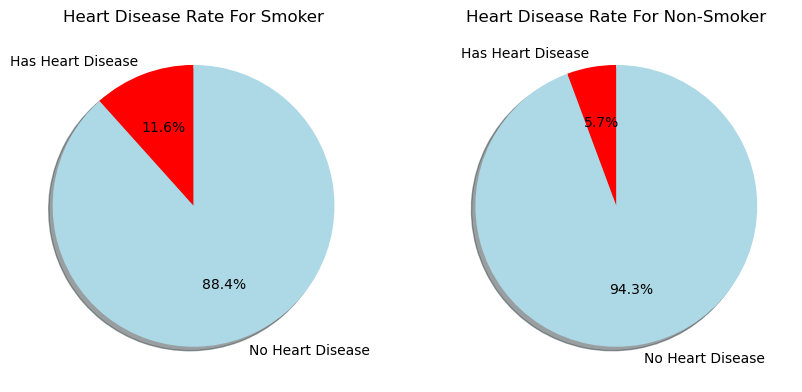

In [98]:
non_smoker_with_hd_df = non_smoker_df.loc[non_smoker_df['Heart_Disease'] == 'Yes', :]
non_smoker_without_hd_df = non_smoker_df.loc[non_smoker_df['Heart_Disease'] == 'No', :]

non_smoker_count = len(non_smoker_df.index)
non_smoker_with_hd_count = len(non_smoker_with_hd_df.index)
non_smoker_without_hd_count = len(non_smoker_without_hd_df.index)

non_smoker_with_hd_percentage = non_smoker_with_hd_count/non_smoker_count
non_smoker_without_hd_percentage = non_smoker_without_hd_count/non_smoker_count

colors = ["red","lightblue"]
#plt.pie([non_smoker_with_hd_percentage, non_smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Non-Smoker')
#plt.axis("equal")
#plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([smoker_with_hd_percentage, smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Heart Disease Rate For Smoker')

ax2.pie([non_smoker_with_hd_percentage, non_smoker_without_hd_percentage], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Heart Disease Rate For Non-Smoker')

plt.show()


In [100]:
#Chi square for smoker analysis:

observed_data = [
    [smoker_with_hd_count, smoker_without_hd_count], [non_smoker_with_hd_count, non_smoker_without_hd_count]
] # a 2x2 matrix
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_data)
print("Chi2 Stat:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)
critial_value = 0.1
rejected = p_value < critial_value
print(f'p-value: {p_value}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{p_value}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{p_value}' is higher than '{critial_value}'."))

Chi2 Stat: 3588.1356452730433
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 10127.65689938 115136.34310062]
 [ 14843.34310062 168746.65689938]]
p-value: 0.0
Null hypothesis is rejected since our p-value '0.0' is lower than '0.1'.


Smoking_History Analysis

In [101]:
#Pie charts for Exercise
group1 = data_df.loc[data_df['Exercise'] == "Yes", :]


group1_yes = group1.loc[group1['Heart_Disease'] == 'Yes', :]
group1_no = group1.loc[group1['Heart_Disease'] == 'No', :]

group1_count = len(group1.index)
group1_yes_percent = len(group1_yes.index)/group1_count
group1_no_percent = len(group1_no.index)/group1_count

#colors = ["red","lightblue"]
#plt.pie([group1_yes_percent, group1_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Those Who Exercise')
#plt.axis("equal")
#plt.show()

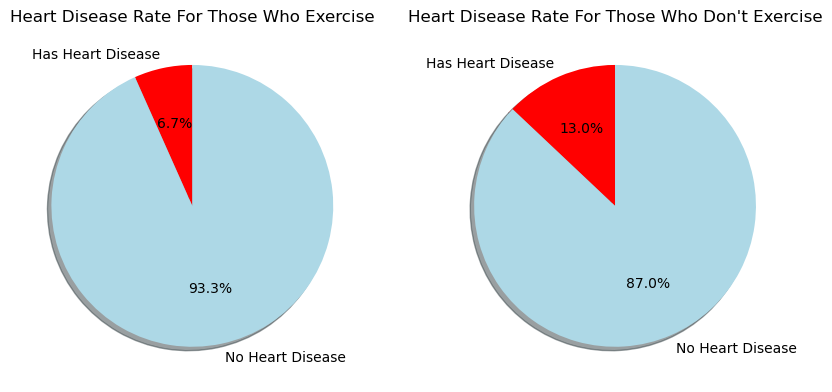

In [102]:
group2 = data_df.loc[data_df['Exercise'] == "No", :]

group2_yes = group2.loc[group2['Heart_Disease'] == 'Yes', :]
group2_no = group2.loc[group2['Heart_Disease'] == 'No', :]

group2_count = len(group2.index)
group2_yes_percent = len(group2_yes.index)/group2_count
group2_no_percent = len(group2_no.index)/group2_count

colors = ["red","lightblue"]
#plt.pie([group2_yes_percent, group2_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.title('Heart Disease Rate For Those Who Don\'t Exercise')
#plt.axis("equal")
#plt.show()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([group1_yes_percent, group1_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Heart Disease Rate For Those Who Exercise')

ax2.pie([group2_yes_percent, group2_no_percent], labels=['Has Heart Disease','No Heart Disease'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Heart Disease Rate For Those Who Don\'t Exercise')

plt.show()


In [104]:
observed_data = [
    [len(group1_yes.index), len(group1_no.index)], [len(group2_yes.index), len(group2_no.index)]
] # a 2x2 matrix
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_data)
print("Chi2 Stat:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)
critial_value = 0.1
rejected = p_value < critial_value
print(f'p-value: {p_value}')
if rejected:
    print(f"Null hypothesis is rejected since our p-value '{p_value}' is lower than '{critial_value}'.")
else:
    print((f"Null hypothesis is not rejected since our p-value '{p_value}' is higher than '{critial_value}'."))

Chi2 Stat: 2866.1544975426523
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 19354.07328705 220026.92671295]
 [  5616.92671295  63856.07328705]]
p-value: 0.0
Null hypothesis is rejected since our p-value '0.0' is lower than '0.1'.
